                  Open        High         Low       Close     Volume  \
Date                                                                    
2019-12-31   27.000000   28.086000   26.805332   27.888666  154285500   
2020-01-02   28.299999   28.713333   28.114000   28.684000  142981500   
2020-01-03   29.366667   30.266666   29.128000   29.534000  266677500   
2020-01-06   29.364668   30.104000   29.333332   30.102667  151995000   
2020-01-07   30.760000   31.441999   30.224001   31.270666  268231500   
...                ...         ...         ...         ...        ...   
2022-10-24  205.820007  213.500000  198.589996  211.250000  100446800   
2022-10-25  210.100006  224.350006  210.000000  222.419998   96507900   
2022-10-26  219.399994  230.600006  218.199997  224.639999   85012500   
2022-10-27  229.770004  233.809998  222.850006  225.089996   61638800   
2022-10-28  225.399994  228.860001  216.350006  228.520004   69039900   

            Dividends  Stock Splits  
Date        

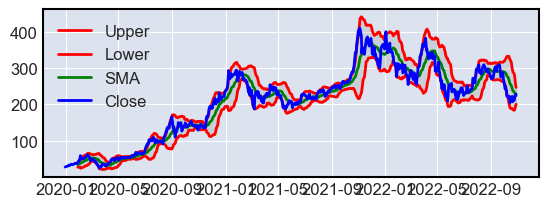

KeyboardInterrupt: 

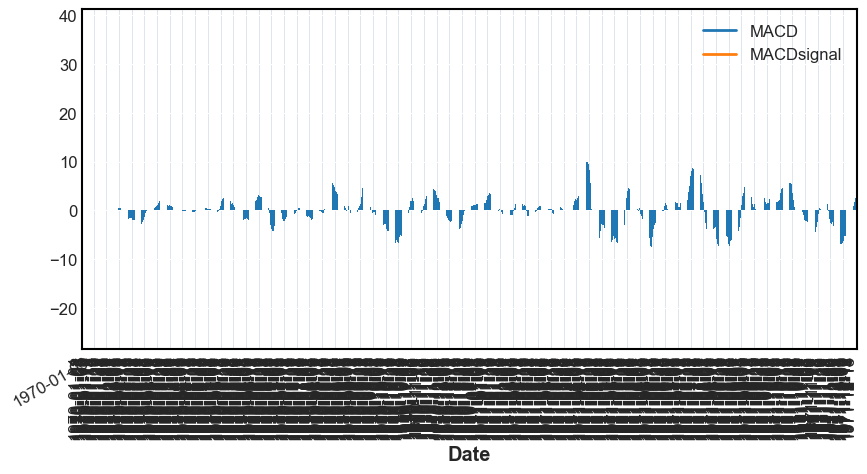

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.express as px
import plotly.graph_objs as go
import mplfinance as mpf
import talib
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

stockid = 'TSLA'
id = yf.Ticker(stockid)
df = id.history(period="max",start="2020-01-01")
print(df)

period = 20

df['SMA'] = df['Close'].rolling(window=period).mean()
df['STD'] = df['Close'].rolling(window=period).std()
df['Upper'] = df['SMA'] + (df['STD']*2)
df['Lower'] = df['SMA'] - (df['STD']*2)
df['Buy_Signal'] = np.where(df.Lower > df.Close, True, False)
df['Sell_Signal'] = np.where(df.Upper < df.Close, True, False)
buys = []
sells = []
open_pos = False

# for i in range(len(value)):
#     if value.Lower[i] > value.Close[i]:
#         if open_pos == False:
#             buys.append(i)
#             open_pos = True
#         elif value.Upper[i] < value.Close[i]:
#             if open_pos:
#                 sells.append(i)
#                 open_pos = False


plt.subplot(2,1,2)
plt.fill_between(df.index,df.Upper,df.Lower,color='grey',alpha=0.2)
plt.plot(df.Upper, label='Upper', color='red')
plt.plot(df.Lower, label='Lower', color='red')
plt.plot(df.SMA, label='SMA', color='green')
plt.plot(df.Close, label='Close', color='blue')
plt.legend()
# plt.scatter(value.iloc[buys].index,value.iloc[buys].Close , marker='^',color='red')
# plt.scatter(value.iloc[sells].index,value.iloc[sells].Close , marker='v',color='green')
plt.show()

df['MACD'],df['MACDsignal'],df['MACDhist'] =  talib.MACD(df['Close'],fastperiod=12, slowperiod=26, signalperiod=9)
df[['MACD','MACDsignal']].plot(kind = 'line', figsize = [10,5])
df['MACDhist'].plot(kind = 'bar', figsize = [10,5])


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.express as px
import plotly.graph_objs as go
import mplfinance as mpf
import talib
from backtesting import Backtest
from backtesting.lib import SignalStrategy



class Strategy(SignalStrategy):
    stockid = 'TSLA'
    id = yf.Ticker(stockid)
    df = id.history(period="max",start="2020-01-01")
    print(df)
    def init(self):
            super().init()
        
            # Precompute the two moving averages
            close = pd.Series(self.data.Close)
            sma1 = close.rolling(20).mean()
            sma2 = close.rolling(60).mean()
        
            # Precompute signal
            signal_long = (sma1 > sma2) & (sma1.shift() < sma2.shift())
            signal_short = (sma1 < sma2) & (sma1.shift() > sma2.shift())
        
            signal = signal_long
            signal[signal_short] = -1
        
            self.set_signal(signal)
        
        
    def next(self):
            super().next()

stockid = 'TSLA'
id = yf.Ticker(stockid)
df = id.history(period="max",start="2020-01-01")
print(df)

bt = Backtest(df , Strategy)
bt.run()
bt.plot()

                  Open        High         Low       Close     Volume  \
Date                                                                    
2019-12-31   27.000000   28.086000   26.805332   27.888666  154285500   
2020-01-02   28.299999   28.713333   28.114000   28.684000  142981500   
2020-01-03   29.366667   30.266666   29.128000   29.534000  266677500   
2020-01-06   29.364668   30.104000   29.333332   30.102667  151995000   
2020-01-07   30.760000   31.441999   30.224001   31.270666  268231500   
...                ...         ...         ...         ...        ...   
2022-10-24  205.820007  213.500000  198.589996  211.250000  100446800   
2022-10-25  210.100006  224.350006  210.000000  222.419998   96507900   
2022-10-26  219.399994  230.600006  218.199997  224.639999   85012500   
2022-10-27  229.770004  233.809998  222.850006  225.089996   61638800   
2022-10-28  225.399994  228.860001  216.350006  228.520004   69039900   

            Dividends  Stock Splits  
Date        

Row(id='2680', ...)